### This is a synthetic parameter estimation experiment of the L63 model, using Global Bayesian Optimization with Expected Improvement.
* The dimension of the parameter space is 3.
* The initial condition is known.
* There is no additive noise.

In [1]:
import sys
sys.path.insert(0, '/Users/lunderman/Documents/GitHub/LMP19')
import LMP19
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process.kernels import RBF,WhiteKernel

In [2]:
nSteps = 100

L63 = LMP19.Models.L63()
true_theta=[10,28,8/3]
res = L63.get_data(theta=true_theta,nSteps=nSteps,dt=0.01)
L63.traj = res

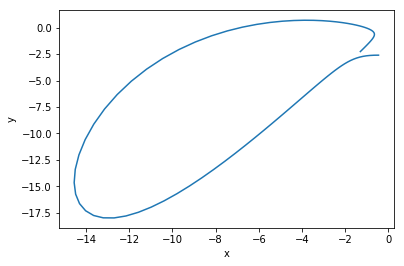

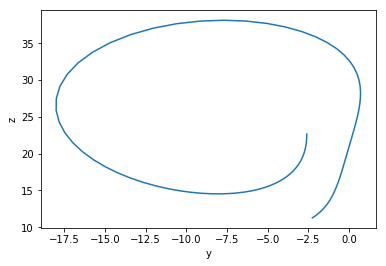

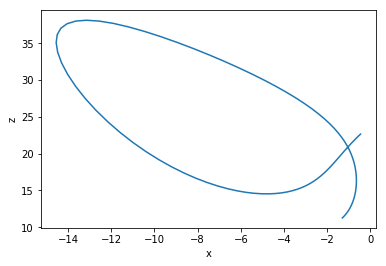

In [17]:
plt.plot(res[0],res[1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()
plt.plot(res[1],res[2])
plt.xlabel('y')
plt.ylabel('z')
plt.show()
plt.plot(res[0],res[2])
plt.xlabel('x')
plt.ylabel('z')
plt.show()

In [4]:
err = 3
lb , ub = [10-err,28-err,8/3-err],[10+err,28+err,8/3+err]
bounds = np.array([lb,ub]).T

In [5]:
def J(theta):
    _res = L63.get_data(theta=theta,x0=L63.traj[:,0],nSteps=nSteps,dt=0.01)
    return(-np.linalg.norm(_res.ravel()-L63.traj.ravel()))

In [6]:
nPts = 50
X = np.random.uniform(lb,ub,(nPts,3))
y = np.zeros((nPts,1))
for kk in range(nPts):
    y[kk,0]= J(X[kk,:])

In [7]:
GBO = LMP19.GBO(J,3,X,y,bounds)

kernel = 1.0**2*RBF(np.max(np.diag(np.cov(X.T))))+1.0**2*WhiteKernel(np.std(y))
GP = GPR(kernel = kernel,normalize_y=False,n_restarts_optimizer=50).fit(X,y)

In [8]:
nIter = 100
GBO.GP = GP
for kk in range(nIter):
    GBO.Expected_Improvement()

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/lunderman/Documents/GitHub/LMP19/LMP19/Estimation/GBO.py:42: RuntimeWarning: divide by zero encountered in true_divide
  return(-(((mu_x - f_star)*norm.cdf((mu_x-f_star)/std_x)+
/Users/lunderman/Documents/GitHub/LMP19/LMP19/Estimation/GBO.py:43: RuntimeWarning: divide by zero encountered in true_divide
  std_x*norm.pdf((mu_x-f_star)/std_x))[0,0]))
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00046945, -0.00094738,  0.00021731,  0.00021731]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 81, 'nit': 16, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_proces

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.01068139,  0.00041537,  0.00085003,  0.00085003]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 101, 'nit': 15, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-12.96812248, -37.55802188,   0.36060584,   0.36060584]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 129, 'nit': 24, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00891495,  0.14777854,  0.20799766,  0.20799766]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 102, 'nit': 15, 'warnfla

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00256205,  0.00448458,  0.25548657,  0.25548657]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 141, 'nit': 32, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-1.34468079e-04, -9.97934369e-04, -1.97507946e-06, -1.97507946e-06]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 75, 'nit': 14, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.09792948, -0.34889232,  0.25664697,  0.25664697]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 120, 'nit': 2

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.02825948, -0.33961623,  0.35318291,  0.35318291]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 100, 'nit': 26, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 0.0005389 , -0.00906346,  0.35253455,  0.35253455]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 103, 'nit': 17, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 12.39121375, -65.90998336,   0.71480604,   0.71480604]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 79, 'nit': 17, 'warnflag

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([  2.61715927, -75.49421441,   0.36694029,   0.36694029]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 86, 'nit': 14, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 35.33256744, -69.60219822,   0.52343819,   0.52343819]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 80, 'nit': 17, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 0.07675181, -0.44543802,  0.35414467,  0.35414467]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 91, 'nit': 23, 'warnfl

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0.00640588, 0.06350594, 0.35543223, 0.35543223]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 71, 'nit': 21, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 0.00839242, -0.01076129,  0.35646836,  0.35646836]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 104, 'nit': 24, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 0.01359929, -0.10227518,  0.35752962,  0.35752962]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 111, 'nit': 23, 'warnflag': 2}
  

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-27.87810329, -18.01696836,  -1.04566189,  -1.04566189]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 97, 'nit': 19, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00119371, -0.00841699,  0.38184928,  0.38184928]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 84, 'nit': 20, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0.00300275, 0.18388632, 0.3575175 , 0.3575175 ]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 99, 'nit': 17, 'warnflag': 2}


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 0.00062376, -0.00826375,  0.23612363,  0.23612363]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 224, 'nit': 29, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00144585, -0.0026649 ,  0.23439304,  0.23439304]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 75, 'nit': 16, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-9.30877868e-05,  1.09822262e-02, -2.75727257e-04, -2.75727257e-04]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 146, 'nit': 3

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 1.79730356e-04, -7.67982760e-04,  2.22024270e-05,  2.22024270e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 98, 'nit': 34, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 0.0001867 , -0.00117482,  0.00010263,  0.00010263]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 78, 'nit': 21, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.22605042,  0.2146501 ,  0.22945   ,  0.22945   ]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 77, 'nit': 16,

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.03999439, -0.00359479,  0.1695869 ,  0.1695869 ]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 124, 'nit': 38, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0.00029364, 0.00845166, 0.17040637, 0.17040637]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 83, 'nit': 22, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00200677, -0.19926558,  0.16203183,  0.16203183]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 86, 'nit': 23, 'warnflag': 2}
  "

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.03661309, -0.03374264,  0.14584587,  0.14584587]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 72, 'nit': 21, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00040415, -0.00392783,  0.14564   ,  0.14564   ]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 104, 'nit': 20, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 0.00091407,  0.00096433, -0.0002234 , -0.0002234 ]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 127, 'nit': 26, 'warnflag': 2

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0.17700748, 0.2586731 , 0.24837823, 0.24837823]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 93, 'nit': 32, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.05598791,  0.00386833,  0.24948443,  0.24948443]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 117, 'nit': 38, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.0022948 , -0.00278224,  0.25005603,  0.25005603]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 99, 'nit': 26, 'warnflag': 2}
  "

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 0.05514476, -0.14956633,  0.24960104,  0.24960104]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 88, 'nit': 25, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.11570397, -0.1736589 ,  0.25132084,  0.25132084]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 129, 'nit': 19, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00079363,  0.00117639, -0.00010258, -0.00010258]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 103, 'nit': 24, 'warnflag': 2

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.01082245,  0.0031817 ,  0.24892532,  0.24892532]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 92, 'nit': 26, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.04059168,  0.08366315,  0.24834846,  0.24834846]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 88, 'nit': 25, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.27688541,  0.71007068,  0.24889465,  0.24889465]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 53, 'nit': 8, 'warnflag': 2}
 

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-2.26719142e-04,  2.32260219e-02,  2.48633612e-01,  2.48633612e-01]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 123, 'nit': 30, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-2.18502054e+01, -5.44548834e+01, -6.25830180e-03, -6.25830180e-03]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 70, 'nit': 8, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00999461,  0.00316667,  0.2480537 ,  0.2480537 ]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls'

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.02143252,  0.0076192 ,  0.2390495 ,  0.2390495 ]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 113, 'nit': 23, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.28947574,  0.86059394,  0.23949908,  0.23949908]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 109, 'nit': 26, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 0.00418264, -0.02251113,  0.23848676,  0.23848676]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 101, 'nit': 19, 'warnflag': 

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00263596,  0.03305136,  0.23678506,  0.23678506]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 89, 'nit': 27, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-7.23525882e-05,  2.40844756e-04, -9.28856602e-06, -9.28856602e-06]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 91, 'nit': 28, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00815839, -0.00286689,  0.00046273,  0.00046273]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 105, 'nit': 23

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([   3.84563369, -132.43042428,    0.25126242,    0.25126242]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 77, 'nit': 16, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 0.00635636, -0.00258147,  0.23873387,  0.23873387]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 76, 'nit': 22, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-1.96625257e-04, -5.69500757e-05,  2.45773304e-05,  2.45773304e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 105, '

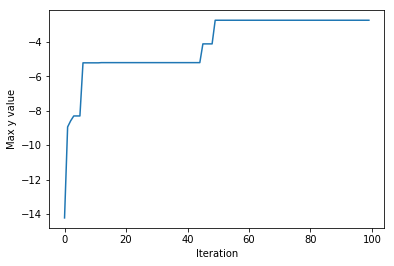

In [9]:
plt.plot(np.arange(nSteps),[np.max(GBO.y[:nPts+kk,0]) for kk in range(nSteps)])
plt.ylabel('Max y value')
plt.xlabel('Iteration')
plt.show()

In [11]:
_res = L63.get_data(theta=GBO.X[np.argmax(GBO.y[:nPts+kk,0]),:],x0=L63.traj[:,0],nSteps=nSteps,dt=0.01)

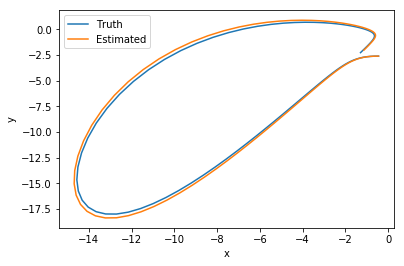

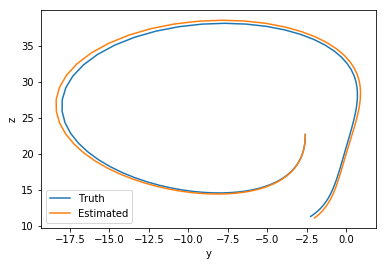

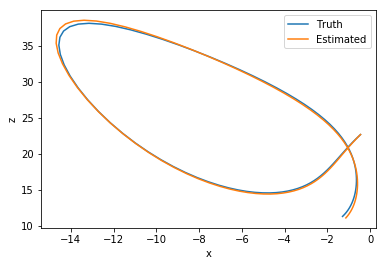

In [15]:
plt.plot(res[0],res[1],label='Truth')
plt.plot(_res[0],_res[1],label='Estimated')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
plt.plot(res[1],res[2],label='Truth')
plt.plot(_res[1],_res[2],label='Estimated')
plt.xlabel('y')
plt.ylabel('z')
plt.legend()
plt.show()
plt.plot(res[0],res[2],label='Truth')
plt.plot(_res[0],_res[2],label='Estimated')
plt.xlabel('x')
plt.ylabel('z')
plt.legend()
plt.show()

In [16]:
print('Selected model parameters:')
GBO.X[np.argmax(GBO.y[:nPts+kk,0]),:]

Selected model parameters:


array([ 9.61721026, 28.17654281,  2.71261083])